In [25]:
import pandas as pd

datos = pd.read_csv('dataframe.csv',sep=',')

In [26]:
datos

,Unnamed: 0,LanguageName,Latitude,Longitude,WordModernName1,Phonetic,SpellingAltv1,source_csv
0,0,Ref. Spelling,-40.00000,-75.50000,ellos,fëjëŋɘn,feyengün,12-feyengün.csv
1,1,Santa Bárbara,-37.67405,-71.80186,ellos,ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
2,2,Cañete,-37.96722,-73.39282,ellos,cʰɪ.ˈðwɪ.ŋɘn,NaN,12-feyengün.csv
3,3,Tirúa,-38.36990,-73.49067,ellos,ˈɸë.jë.ɣ̞ɐ̝,NaN,12-feyengün.csv
4,4,Alto Bío Bío,-38.04457,-71.36344,ellos,m̩.ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
...,...,...,...,...,...,...,...,...
1336,1336,Huiliches,-39.63992,-71.18686,vino,pʊl.ˈkʊ,NaN,9-pulkü.csv
1337,1337,Jacobacci,-41.28813,-69.55719,vino,ɸʊl.ˈkʰʊ,NaN,9-pulkü.csv
1338,1338,Cushamen,-42.23392,-71.34994,vino,pʰʊl.ˈkʰʊ,NaN,9-pulkü.csv
1339,1339,Futaleufú,-42.95052,-71.18351,vino,ɸʊl.ˈxʊ,NaN,9-pulkü.csv


In [27]:
names = set(datos['LanguageName'])

In [28]:
latitud = dict(zip(datos['LanguageName'],datos['Latitude']))
longitud = dict(zip(datos['LanguageName'],datos['Longitude']))

In [29]:
!pip install haversine

In [30]:
from haversine import haversine

dist_ref = {}

for name in names:
    dist_ref[name]=haversine((latitud['Ref. Spelling'],longitud['Ref. Spelling']),(latitud[name],longitud[name]))

In [31]:
dict(sorted(dist_ref.items(), key=lambda item: item[1]))

{'Ref. Spelling': 0.0,
 'S. Juan de la Costa': 177.2301646411767,
 'San Pablo': 187.52961105844628,
 'Mariquina': 200.66463550716253,
 'Valdivia': 218.12032841870442,
 'Nueva Toltén': 221.15562634114468,
 'Puerto Saavedra': 225.5252027037372,
 'Tirúa': 250.67761263456197,
 'Freire': 250.96348222924908,
 'Lanco': 266.94833257084656,
 'Chol Chol': 272.9018985250136,
 'Dollinco': 273.13440851944256,
 'Villarrica': 279.16837427982796,
 'Cañete': 290.2632931832423,
 'Panguipulli': 292.749353721012,
 'Galvarino': 293.40598618706326,
 'Truf Truf': 297.1690821506928,
 'Lumaco': 302.4937108473996,
 'Vilcún': 315.5253689601365,
 'Cunco': 320.0409799366874,
 'Victoria': 338.71066341320477,
 'Angol': 340.3195155866509,
 'Ercilla': 341.54143070236387,
 'Curarrehue': 342.7200756940107,
 'Junín de los Andes': 359.79125763113615,
 'Huiliches': 370.4940777627709,
 'Aluminé': 391.207483327272,
 'Lonquimay': 396.4700944105974,
 'Icalma': 397.1683552087326,
 'Santa Bárbara': 411.623510725252,
 'Alto Bío B

In [32]:
names

{'Alto Bío Bío',
 'Aluminé',
 'Angol',
 'Cañete',
 'Chalileo',
 'Chol Chol',
 'Cunco',
 'Curarrehue',
 'Cushamen',
 'Dollinco',
 'Ercilla',
 'Freire',
 'Futaleufú',
 'Galvarino',
 'Huiliches',
 'Icalma',
 'Jacobacci',
 'Junín de los Andes',
 'Lago Rosario',
 'Lanco',
 'Lonquimay',
 'Lumaco',
 'Mariquina',
 'Nueva Toltén',
 'Panguipulli',
 'Picunches',
 'Puerto Saavedra',
 'Ref. Spelling',
 'S. Juan de la Costa',
 'San Pablo',
 'Santa Bárbara',
 'Tirúa',
 'Truf Truf',
 'Valdivia',
 'Victoria',
 'Vilcún',
 'Villarrica',
 'Zapala'}

In [33]:
palabras = set(datos['WordModernName1'])

In [34]:
palabras

{'amigo',
 'bajar',
 'boca',
 'bueno',
 'cama',
 'camino',
 'campo',
 'cochayuyo',
 'cola',
 'coser',
 'cuerno',
 'dia',
 'ellos',
 'estrella',
 'fuego',
 'grande',
 'harina_tostada',
 'hoja',
 'lengua',
 'lenya',
 'llorar',
 'luna',
 'mano',
 'matar',
 'negro',
 'noble',
 'nombre',
 'nube',
 'persona_que_ensenya',
 'pie',
 'puerta',
 'rojo',
 'saber',
 'sangre',
 'sol',
 'tengo_hambre',
 'tres',
 'vestido_lana',
 'vino',
 'zorro'}

In [35]:
palabras_elegidas = ['boca'] ## puedes agregar más

In [36]:
dict_datos = {L:{} for L in names}

In [37]:
for L in names:
    for word in palabras_elegidas:
        D = datos[datos['LanguageName']==L]
        try:
            dict_datos[L][word]=list(D[D['WordModernName1']==word]['Phonetic'])[0]
        except IndexError:
            pass#dict_datos[L][word]='unk'

In [38]:
set_palabras = []

for L in names:
    set_palabras+=[list(dict_datos[L].keys())]

In [39]:
set_palabras = list(set.intersection(*map(set,set_palabras)))

In [40]:
set_palabras

['boca']

In [41]:
dict_datos = {name:{word:dict_datos[name][word] for word in set_palabras} for name in names}

In [42]:
dict_datos['San Pablo']

{'boca': 'm̩.ˈbɘn'}

In [43]:
dict_datos['S. Juan de la Costa']

{'boca': 'wɘn̪'}

In [44]:
import itertools
pares_localidades = list(itertools.product(list(dict_datos.keys()), list(dict_datos.keys())))

In [45]:
pares_localidades

[('Santa Bárbara', 'Santa Bárbara'),
 ('Santa Bárbara', 'Truf Truf'),
 ('Santa Bárbara', 'Icalma'),
 ('Santa Bárbara', 'San Pablo'),
 ('Santa Bárbara', 'Nueva Toltén'),
 ('Santa Bárbara', 'Alto Bío Bío'),
 ('Santa Bárbara', 'Villarrica'),
 ('Santa Bárbara', 'Angol'),
 ('Santa Bárbara', 'Lanco'),
 ('Santa Bárbara', 'Futaleufú'),
 ('Santa Bárbara', 'Dollinco'),
 ('Santa Bárbara', 'Freire'),
 ('Santa Bárbara', 'Chol Chol'),
 ('Santa Bárbara', 'S. Juan de la Costa'),
 ('Santa Bárbara', 'Chalileo'),
 ('Santa Bárbara', 'Lonquimay'),
 ('Santa Bárbara', 'Vilcún'),
 ('Santa Bárbara', 'Ref. Spelling'),
 ('Santa Bárbara', 'Ercilla'),
 ('Santa Bárbara', 'Valdivia'),
 ('Santa Bárbara', 'Picunches'),
 ('Santa Bárbara', 'Zapala'),
 ('Santa Bárbara', 'Cushamen'),
 ('Santa Bárbara', 'Curarrehue'),
 ('Santa Bárbara', 'Galvarino'),
 ('Santa Bárbara', 'Huiliches'),
 ('Santa Bárbara', 'Cunco'),
 ('Santa Bárbara', 'Puerto Saavedra'),
 ('Santa Bárbara', 'Junín de los Andes'),
 ('Santa Bárbara', 'Tirúa'),
 ('

In [46]:
## aquí guardas las distancias

distancias = {L:{LL:0 for LL in list(dict_datos.keys())} for L in list(dict_datos.keys())}

In [47]:
!pip install jellyfish

In [48]:
import jellyfish

def funcion_distancia(string1,string2):
    #return 1-jellyfish.jaro_winkler_similarity(string1,string2)
    return jellyfish.levenshtein_distance(string1,string2)/(max(len(string1),len(string2)))

In [49]:
## tienes q recorrer pares_localidades

for par in pares_localidades:
    D = 0
    words1 = dict_datos[par[0]]
    words2 = dict_datos[par[1]]
    words1and2 = list(set(words1) & set(words2))
    for word in words1and2:
        D += funcion_distancia(dict_datos[par[0]][word],dict_datos[par[1]][word])
    distancias[par[0]][par[1]]=D/len(words1and2)

In [50]:
distancias['Ref. Spelling']

{'Santa Bárbara': 0.25,
 'Truf Truf': 0.25,
 'Icalma': 0.25,
 'San Pablo': 0.8571428571428571,
 'Nueva Toltén': 0.25,
 'Alto Bío Bío': 0.25,
 'Villarrica': 0.25,
 'Angol': 0.25,
 'Lanco': 0.25,
 'Futaleufú': 0.25,
 'Dollinco': 0.25,
 'Freire': 0.25,
 'Chol Chol': 0.25,
 'S. Juan de la Costa': 0.0,
 'Chalileo': 0.25,
 'Lonquimay': 0.25,
 'Vilcún': 0.25,
 'Ref. Spelling': 0.0,
 'Ercilla': 0.25,
 'Valdivia': 0.25,
 'Picunches': 0.25,
 'Zapala': 0.25,
 'Cushamen': 0.25,
 'Curarrehue': 0.25,
 'Galvarino': 0.25,
 'Huiliches': 0.25,
 'Cunco': 0.25,
 'Puerto Saavedra': 0.5,
 'Junín de los Andes': 0.25,
 'Tirúa': 0.25,
 'Mariquina': 0.25,
 'Aluminé': 0.8,
 'Lago Rosario': 0.25,
 'Panguipulli': 0.25,
 'Victoria': 0.5,
 'Cañete': 0.25,
 'Lumaco': 0.25,
 'Jacobacci': 0.25}

In [51]:
dict_geo_fon = {}

for localidad in distancias['Ref. Spelling'].keys():
    dict_geo_fon[localidad]=[dist_ref[localidad],distancias['Ref. Spelling'][localidad]]

In [52]:
X = [dict_geo_fon[localidad][0] for localidad in dict_geo_fon.keys()]
Y = [dict_geo_fon[localidad][1] for localidad in dict_geo_fon.keys()]

In [53]:
!pip install adjustText

In [54]:
DF = pd.DataFrame.from_dict(distancias)

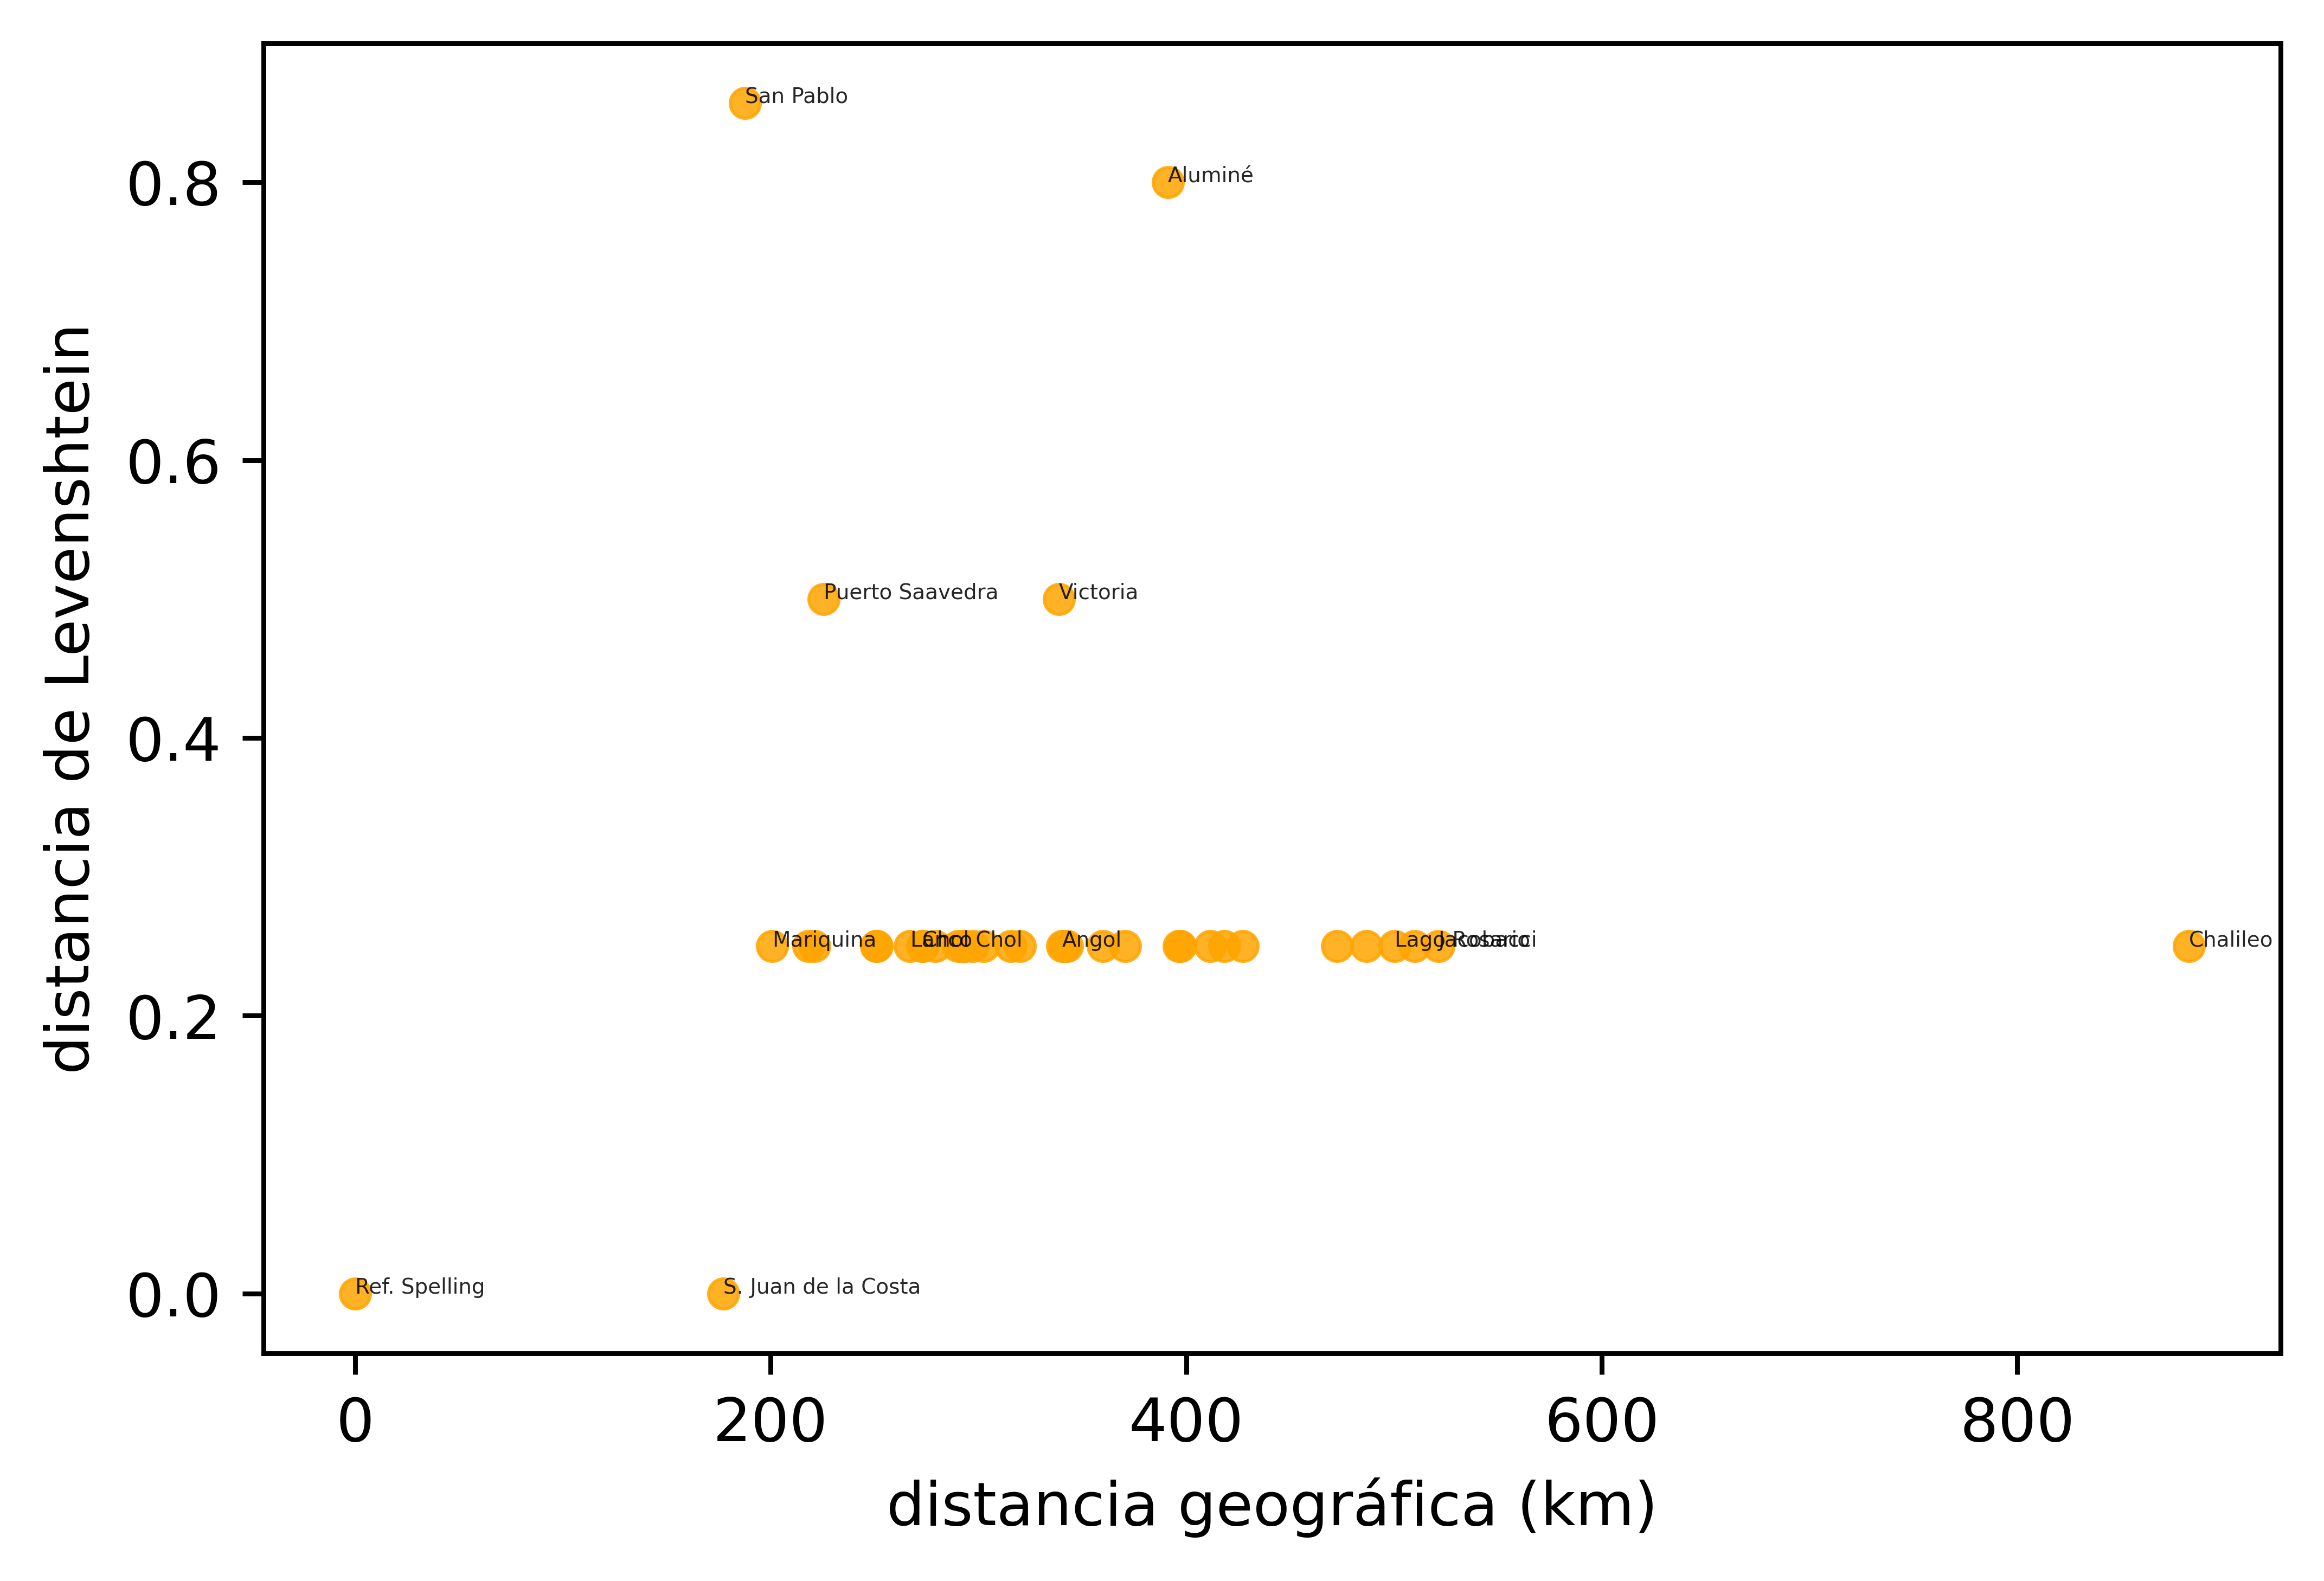

In [68]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots(dpi=800)

for localidad in dict_geo_fon.keys():
    i = list(dict_geo_fon.keys()).index(localidad)
    if localidad in ['Ref. Spelling','Aluminé','Victoria','','','','','S. Juan de la Costa','','Angol','Chol Chol','',
 'Mariquina','Lago Rosario','San Pablo','Puerto Saavedra','', '', 'Chalileo', '', '', '']:
        ax.annotate(localidad, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

#texts = [plt.text(X[i],Y[i],list(dict_geo_fon.keys())[i]) for i in range(len(list(dict_geo_fon.keys())))]
#adjust_text(texts)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
# plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Levenshtein',fontsize=10)
plt.xlabel(r'distancia geográfica (km)',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('geo_Lev_boca.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [56]:
DF = pd.DataFrame.from_dict(distancias)

In [57]:
DF

,Santa Bárbara,Truf Truf,Icalma,San Pablo,Nueva Toltén,Alto Bío Bío,Villarrica,Angol,Lanco,Futaleufú,...,Junín de los Andes,Tirúa,Mariquina,Aluminé,Lago Rosario,Panguipulli,Victoria,Cañete,Lumaco,Jacobacci
Santa Bárbara,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Truf Truf,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Icalma,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
San Pablo,0.714286,0.714286,0.714286,0.000000,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,...,0.714286,0.714286,0.714286,0.428571,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286
Nueva Toltén,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Alto Bío Bío,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Villarrica,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Angol,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Lanco,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
Futaleufú,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000


In [58]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D):
    
    
    linkage = hc.linkage(sp.distance.squareform(DF), method='ward')
        
    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D,cmap='OrRd',row_linkage=linkage, col_linkage=linkage,linewidth=1,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
       
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmap_boca.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

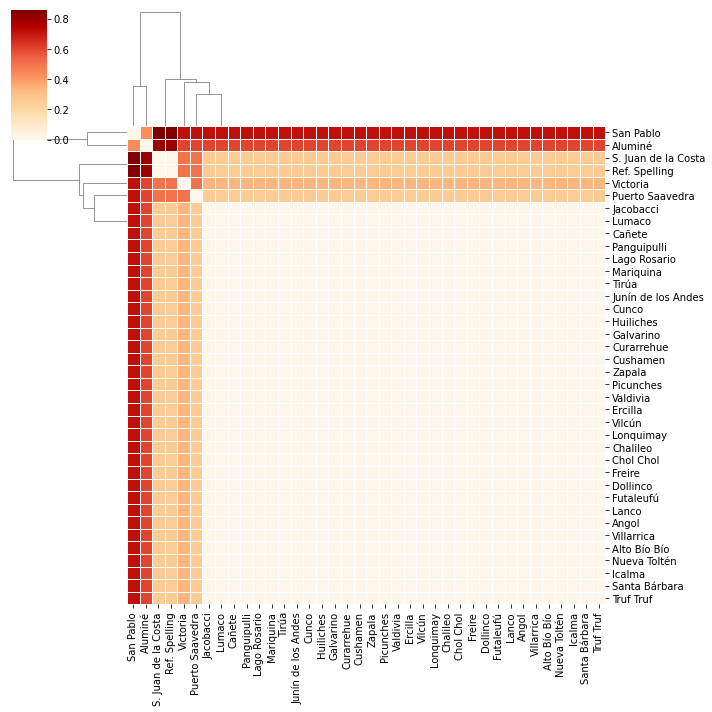

In [59]:
mapa_calor(distancias)